In [15]:
import cv2

def preprocess_image(image_path):
    # Baca gambar
    img = cv2.imread(image_path)
    # Resize gambar menjadi 100x100
    resized_img = cv2.resize(img, (100, 100))
    return resized_img


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def extract_and_show_histogram(hsv_img):
    # Visualisasi histogram untuk setiap kanal
    plt.figure(figsize=(12, 4))
    
    # Plot histogram untuk Hue
    plt.subplot(1, 3, 1)
    plt.title('Hue Channel')
    plt.hist(hsv_img[:, :, 0].ravel(), bins=180, range=[0, 180], color='r')
    plt.xlabel('Hue')
    plt.ylabel('Frequency')
    
    # Plot histogram untuk Saturation
    plt.subplot(1, 3, 2)
    plt.title('Saturation Channel')
    plt.hist(hsv_img[:, :, 1].ravel(), bins=256, range=[0, 256], color='g')
    plt.xlabel('Saturation')
    plt.ylabel('Frequency')

    # Plot histogram untuk Value
    plt.subplot(1, 3, 3)
    plt.title('Value Channel')
    plt.hist(hsv_img[:, :, 2].ravel(), bins=256, range=[0, 256], color='b')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Tampilkan histogram
    plt.tight_layout()
    plt.show()

def extract_features(image):
    # Konversi gambar ke HSV
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Ekstrak histogram warna
    hist = cv2.calcHist([hsv_img], [0, 1, 2], None, [8, 8, 8], [0, 180, 0, 256, 0, 256])
    # Normalisasi histogram
    cv2.normalize(hist, hist)
    # Visualisasi histogram dengan gambar yang sudah diubah ke HSV
    extract_and_show_histogram(hsv_img)
    return hist.flatten()


In [17]:
import numpy as np

def euclidean_distance(point1, point2):
    """Hitung jarak Euclidean antara dua titik."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans_manual(features, k, max_iters=100):
    """Fungsi KMeans manual."""
    # 1. Inisialisasi centroid dengan memilih secara acak dari data
    random_indices = np.random.choice(features.shape[0], k, replace=False)
    centroids = features[random_indices]

    for _ in range(max_iters):
        # 2. Assign cluster
        labels = np.zeros(features.shape[0])
        for i in range(features.shape[0]):
            distances = np.array([euclidean_distance(features[i], centroid) for centroid in centroids])
            labels[i] = np.argmin(distances)  # Tetapkan ke cluster terdekat

        # 3. Update centroid
        new_centroids = np.zeros(centroids.shape)
        for j in range(k):
            if np.any(labels == j):  # Pastikan ada data di cluster
                new_centroids[j] = features[labels == j].mean(axis=0)

        # 4. Periksa konvergensi (jika centroid tidak berubah)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

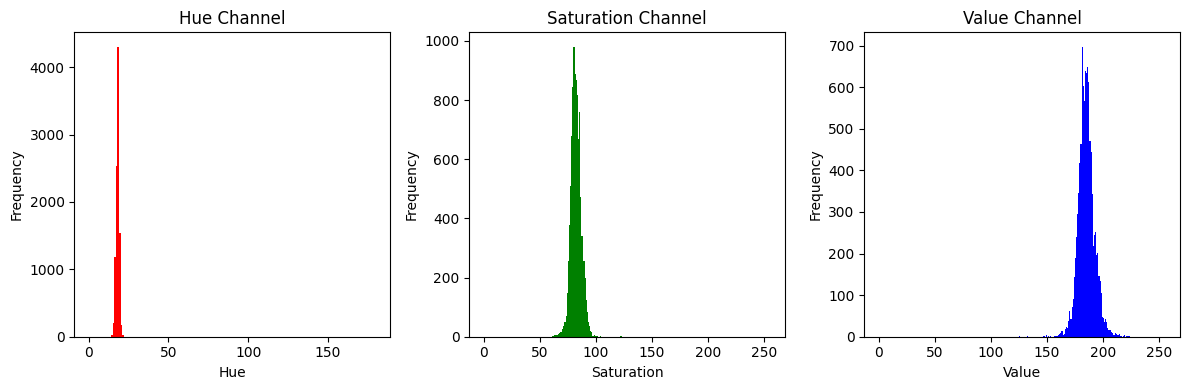

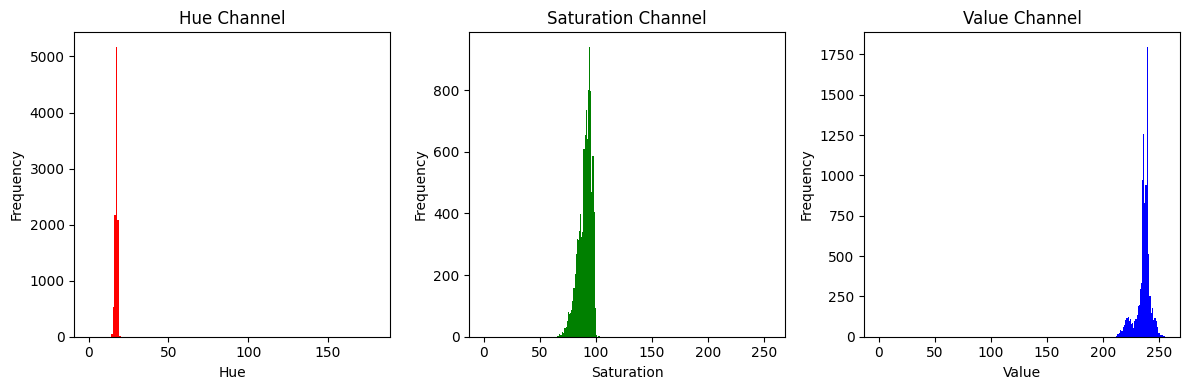

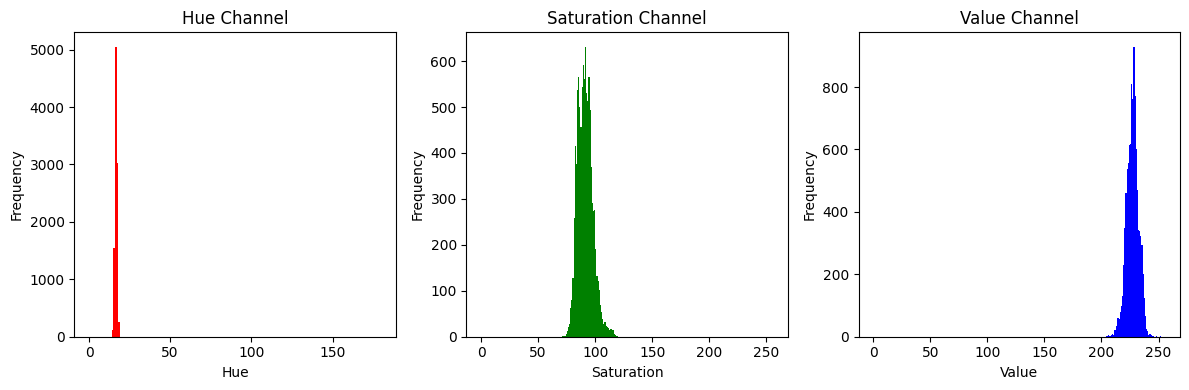

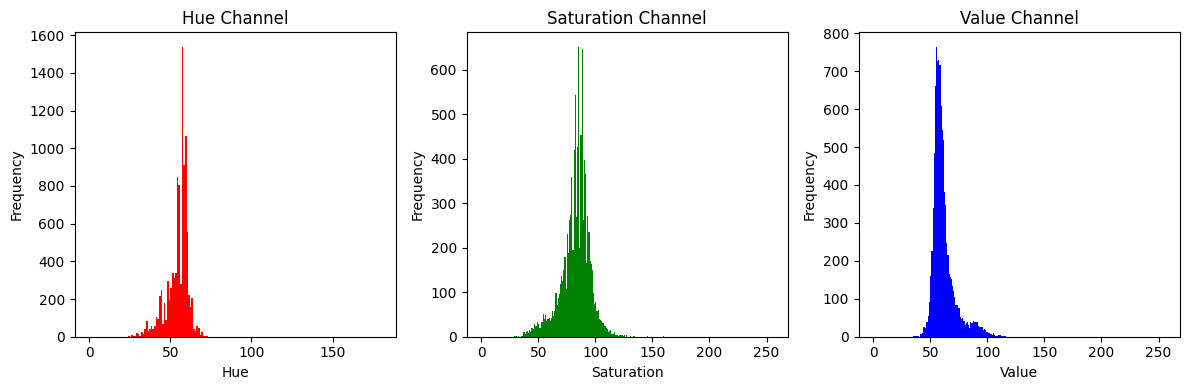

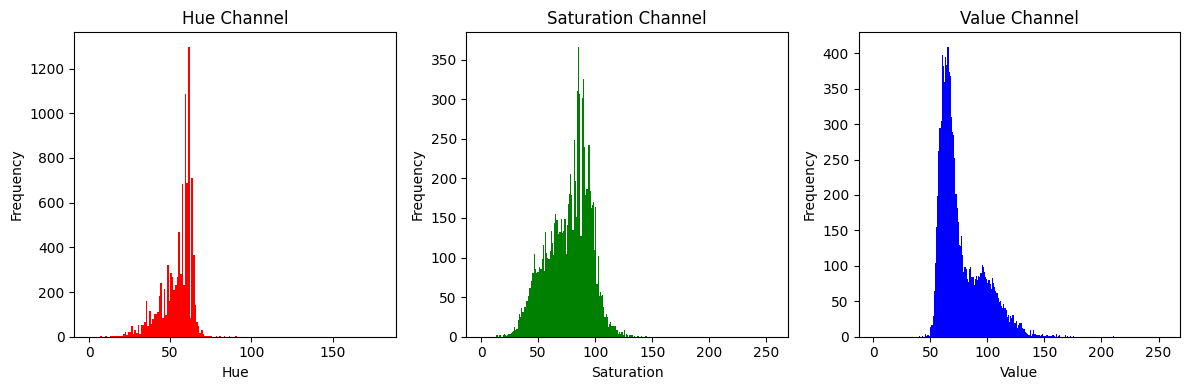

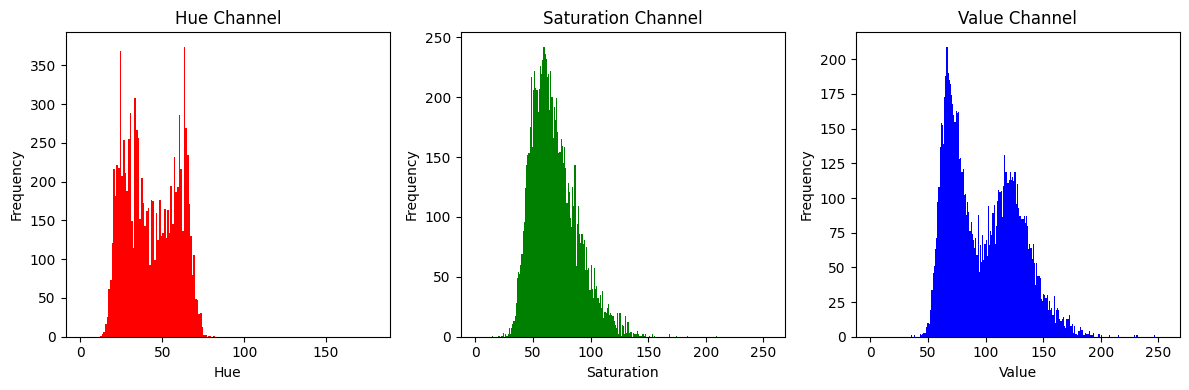

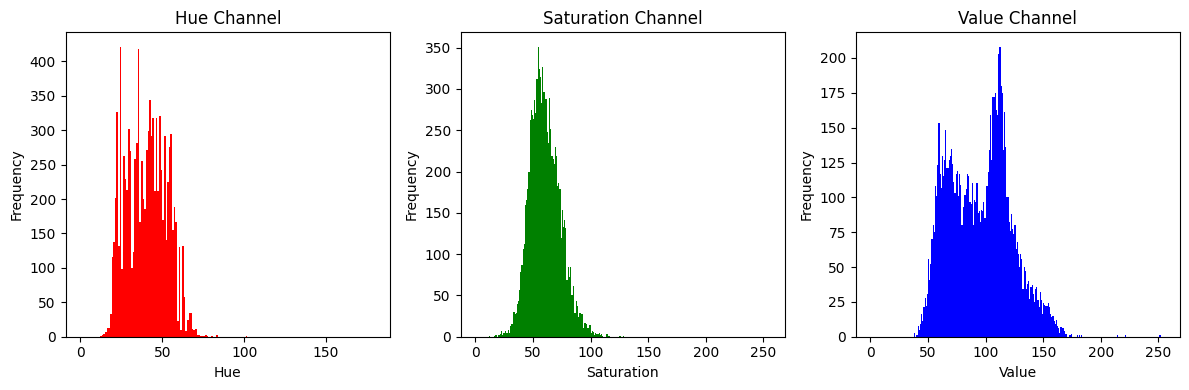

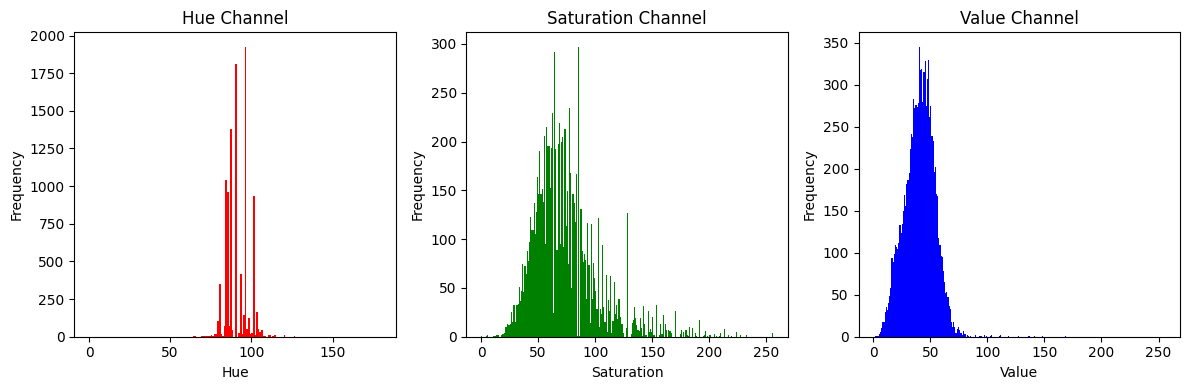

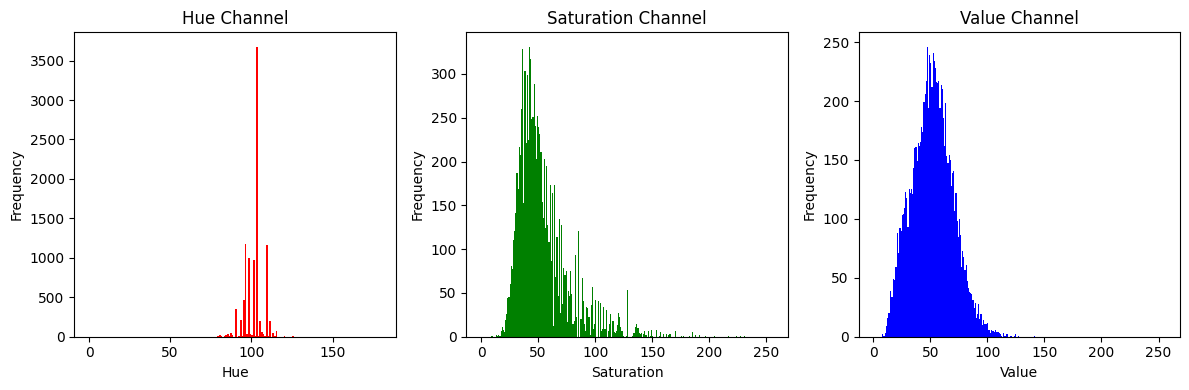

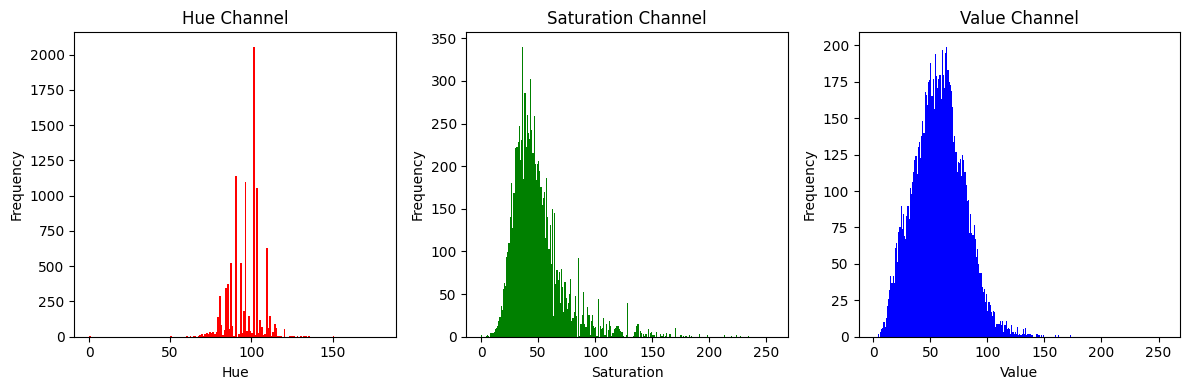

[1. 1. 1. 3. 3. 3. 3. 0. 2. 2.]


In [18]:
from sklearn.cluster import KMeans
import numpy as np

# Anggap kita sudah punya data fitur dari setiap gambar
features = []
for i in range(1, 11):
    img = preprocess_image(f'data/{i}.jpg')
    feature = extract_features(img)
    features.append(feature)

features = np.array(features)

# Tentukan jumlah cluster k (misalnya 3)
labels, kmeans = kmeans_manual(features, k=4, max_iters=100)

np.savetxt('a.txt', features, delimiter=',')
print(labels)  # Output label cluster dari setiap gambar


In [20]:
import matplotlib.pyplot as plt

for i in range(4):  # Misal ada 3 cluster
    cluster_images = [f'{j+1}.png' for j in range(10) if labels[j] == i]
    print(f"Cluster {i}: {cluster_images}")


Cluster 0: ['8.png']
Cluster 1: ['1.png', '2.png', '3.png']
Cluster 2: ['9.png', '10.png']
Cluster 3: ['4.png', '5.png', '6.png', '7.png']
